In [97]:
import numpy as np
import matplotlib.pyplot as plt

# General Code

### Plotting

In [98]:
def plot_decision_boundary(X,W,t):
    #plot classes
    plt.scatter(X[0,:], X[1,:], c=t[0,:])
    
    #plot line
    x = [-5,5]
    y = [line(x[0],W), line(x[1],W)]
    plt.plot(x, y)
    
    plt.show()
    
def line(x,W):
    k = -(W.T[0]/W.T[1])
    m = -W.T[2]/W.T[1]
    return k*x+m

### Generating

In [99]:
def gen_binary():
    n = 100
    mA = [1.0, 0.7]
    mB = [-1.5, 0.0]
    sigmaA = 0.4
    sigmaB = 0.35
    classA1 = np.random.normal(mA[0],sigmaA,n) 
    classA2 = np.random.normal(mA[1],sigmaA,n)
    classA = np.vstack((classA1,classA2))
    classB1 = np.random.normal(mB[0],sigmaB,n)
    classB2 = np.random.normal(mB[1],sigmaB,n)
    classB = np.vstack((classB1,classB2))
    
    # Make a nice plot of the data
    data = (classA, classB)
    colors = ("red", "blue")
    groups = ("classA", "classB")

    
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)

    for data, color, group in zip(data, colors, groups):
        x, y = data
        ax.scatter(x, y, alpha=0.8, c=color, edgecolors='none', s=30, label=group)

    plt.title('Sampled Data Distribution')
    plt.legend(loc=2)
    plt.show()

    # Return both classes shuffled into one dataset.
    shuffled_data = np.concatenate((classA,classB),axis=1)
    np.random.shuffle(shuffled_data)
    return shuffled_data


In [100]:
np.random.seed(24)
X, T = gen_binary(3, False)
print(X)
print(t)

[[ 1.66460609 -0.85213906 -0.71779157  0.84185982 -1.81320212  0.61498327]
 [ 0.00459481  0.3394024   0.1097826  -0.21935664  0.94463637 -0.03540813]
 [ 0.          0.          0.          0.          0.          0.        ]]
[[ 1. -1. -1.  1. -1.  1.]]


# Delta Rule

In [101]:
def delta(X,W,T,n):
    inner = np.dot(W,X) - T
    return n * np.dot(inner, np.transpose(X))

def run_delta(X,T,n_epochs):
    #notation: T = true label, y = predicted label 
    n = 0.001
    W = gen_W(X)
    for e in range(n_epochs):
        for i in range(X.shape[1]):
            x = X[:,i,None] 
            t = T[:,i,None]
            
            Y = np.dot(W,x)
            Y[Y > 0] = 1
            Y[Y <= 0] = -1
            
            W = W + delta(X,W,Y,n)
    return W
#         dw = delta(X,W,t,n)
#         W = W + dw

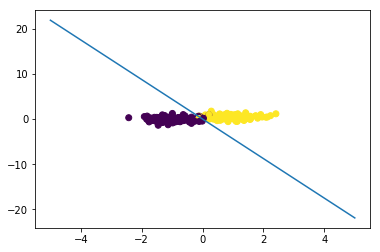

In [102]:
X, T = gen_binary(100, False)
W = run_delta(X,T,5)
plot_decision_boundary(X,W,T)

# Main

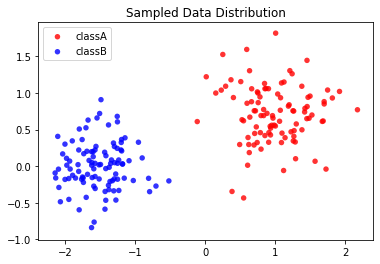

In [27]:
data = gen_binary()